<a href="https://colab.research.google.com/github/SethupathyM/Supervised_ML_Classification_Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import math

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# Reading the CSV file
df = pd.read_csv('/content/Mydrive/MyDrive/Captone_Project_Supervised_ML_Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv')

In [4]:
# Shape
df.shape

(3390, 17)

In [5]:
# Head
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Tail
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# Duplicates
df.duplicated().sum()

0

In [9]:
# Null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
# Replacing 'M' with 1 and 'F' with 0 in 'sex' variable

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

# Replacing 'YES' with 1 and 'NO' with 0 in 'is_smoking' variable

df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)


In [11]:
# Treating NULL values
# 'education'
df['education'].fillna(0,inplace = True)
df.groupby('education').agg({'age':'mean'})
# print(df.groupby('education').agg({'age':'mean'}))
# From this we can replace education '0' with '1'
df['education'] = df['education'].apply(lambda x : 1 if x == 0 else x)

# 'cigsPerDay'
df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'})
# print(df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'}))
df.loc[ (df.sex == 0) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  14
df.loc[ (df.sex == 1) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  22

# 'totChol'
df['totChol'].fillna(int(df['totChol'].mean()), inplace = True)

# 'BMI'
df['BMI'].fillna(int(df['BMI'].mean()), inplace = True)

# 'Heart rate'
df['heartRate'].fillna(int(df['heartRate'].mean()), inplace = True)


# 'glucose'
df.groupby('diabetes').agg({'glucose':'mean'})
# print(df.groupby('diabetes').agg({'glucose':'mean'}))
df.loc[ (df.diabetes == 0) & (df['glucose'].isna()), 'glucose'] =  79
df.loc[ (df.diabetes == 1) & (df['glucose'].isna()), 'glucose'] =  172

# 'BPMeds'
df.loc[(df.prevalentHyp == 1) & (df['BPMeds'].isna()), 'BPMeds'] =  1

In [12]:
# Droping the rows with 'BPMeds' as Nan value
df = df.dropna()
df.shape

(3365, 17)

In [13]:
# Summary
round(df.describe([0.95,0.99],include = 'all'),2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3365.00,3365.00,3365.00,3365.00,3365.0,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00
mean,1695.31,49.53,1.95,0.43,0.5,9.11,0.04,0.01,0.32,0.03,237.12,132.67,82.93,25.80,75.98,81.92,0.15
std,978.64,8.59,1.02,0.50,0.5,11.85,0.18,0.08,0.47,0.16,44.98,22.34,12.04,4.11,11.99,23.37,0.36
min,0.00,32.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
50%,1694.00,49.00,2.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,235.00,128.50,82.00,25.38,75.00,79.00,0.00
95%,3219.80,64.00,4.00,1.00,1.0,30.00,0.00,0.00,1.00,0.00,313.00,175.90,105.00,32.84,98.00,108.00,1.00
99%,3355.36,67.00,4.00,1.00,1.0,43.00,1.00,0.00,1.00,1.00,354.36,202.18,119.36,38.87,110.00,173.00,1.00
max,3389.00,70.00,4.00,1.00,1.0,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


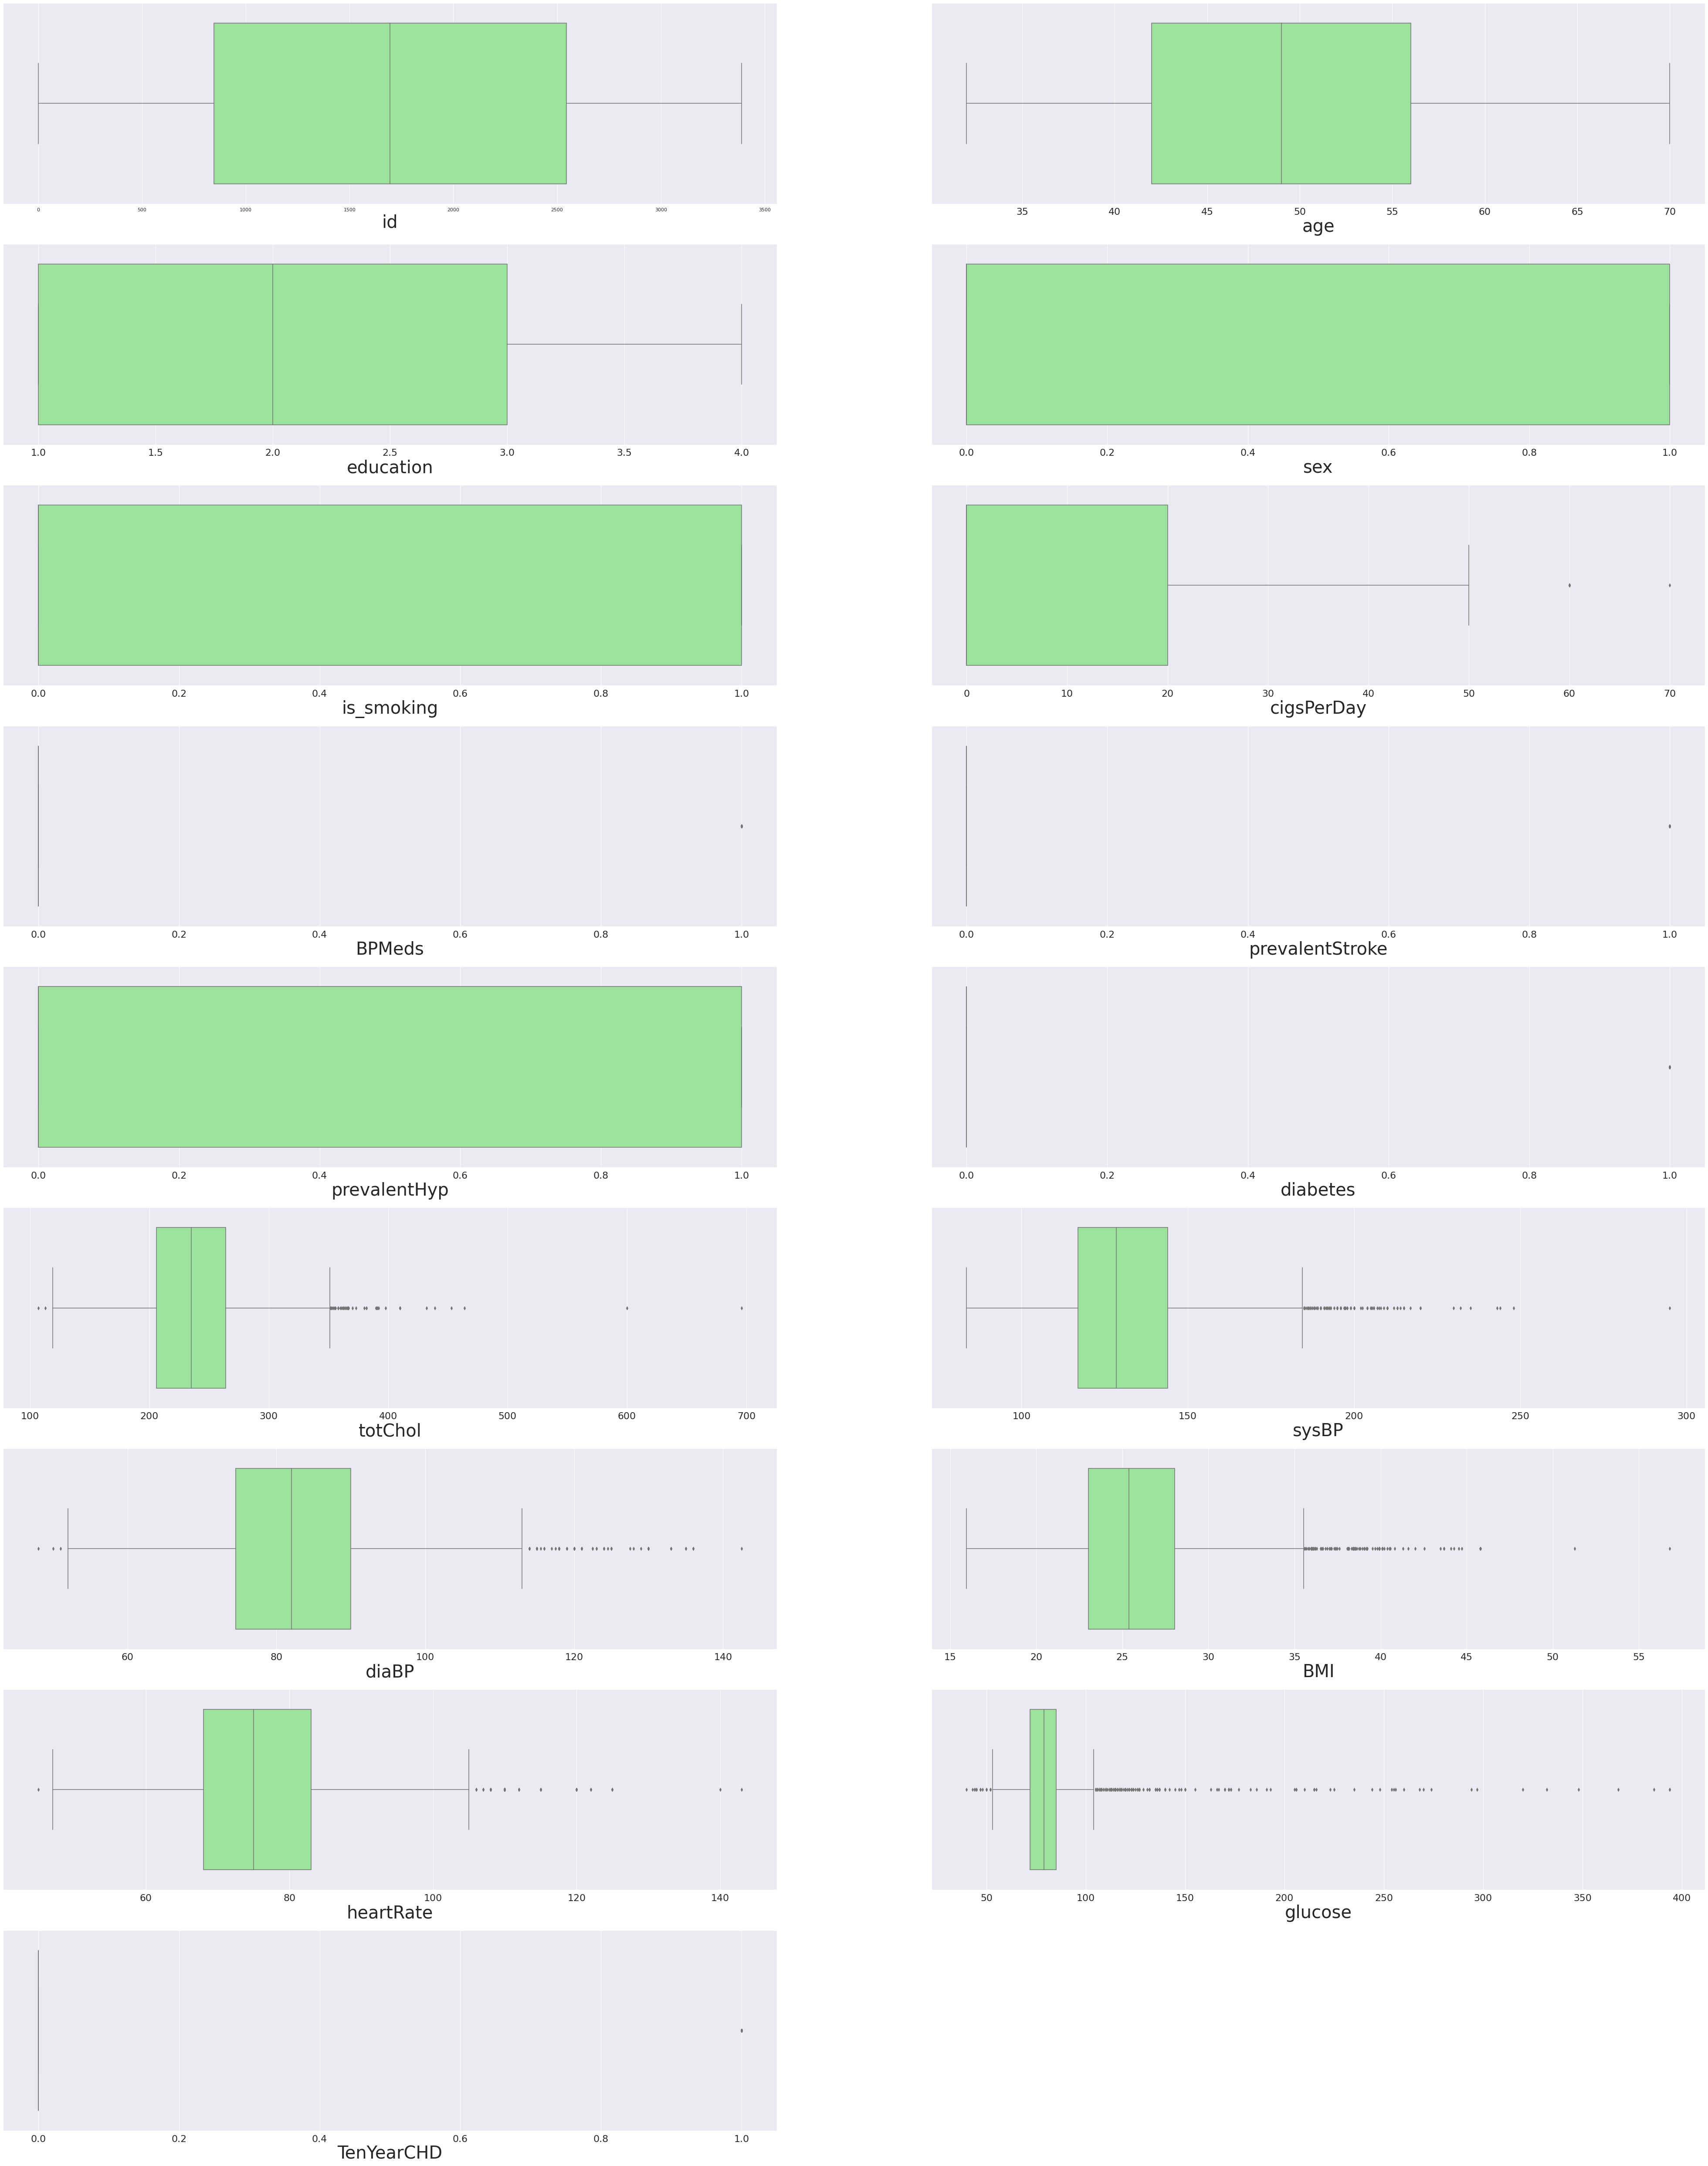

In [14]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='lightgreen')
    plt.xlabel(i[1],fontsize=40)

In [15]:
# Z Score based technique to remove outliers
lst = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

cigsPerDayLower_limit: -26.46
cigsPerDayUpper_limit: 44.67
totCholLower_limit: 102.2
totCholUpper_limit: 372.05
sysBPLower_limit: 65.66
sysBPUpper_limit: 199.69
diaBPLower_limit: 46.81
diaBPUpper_limit: 119.04
BMILower_limit: 13.48
BMIUpper_limit: 38.12
heartRateLower_limit: 40.02
heartRateUpper_limit: 111.95
glucoseLower_limit: 11.8
glucoseUpper_limit: 152.04


In [16]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

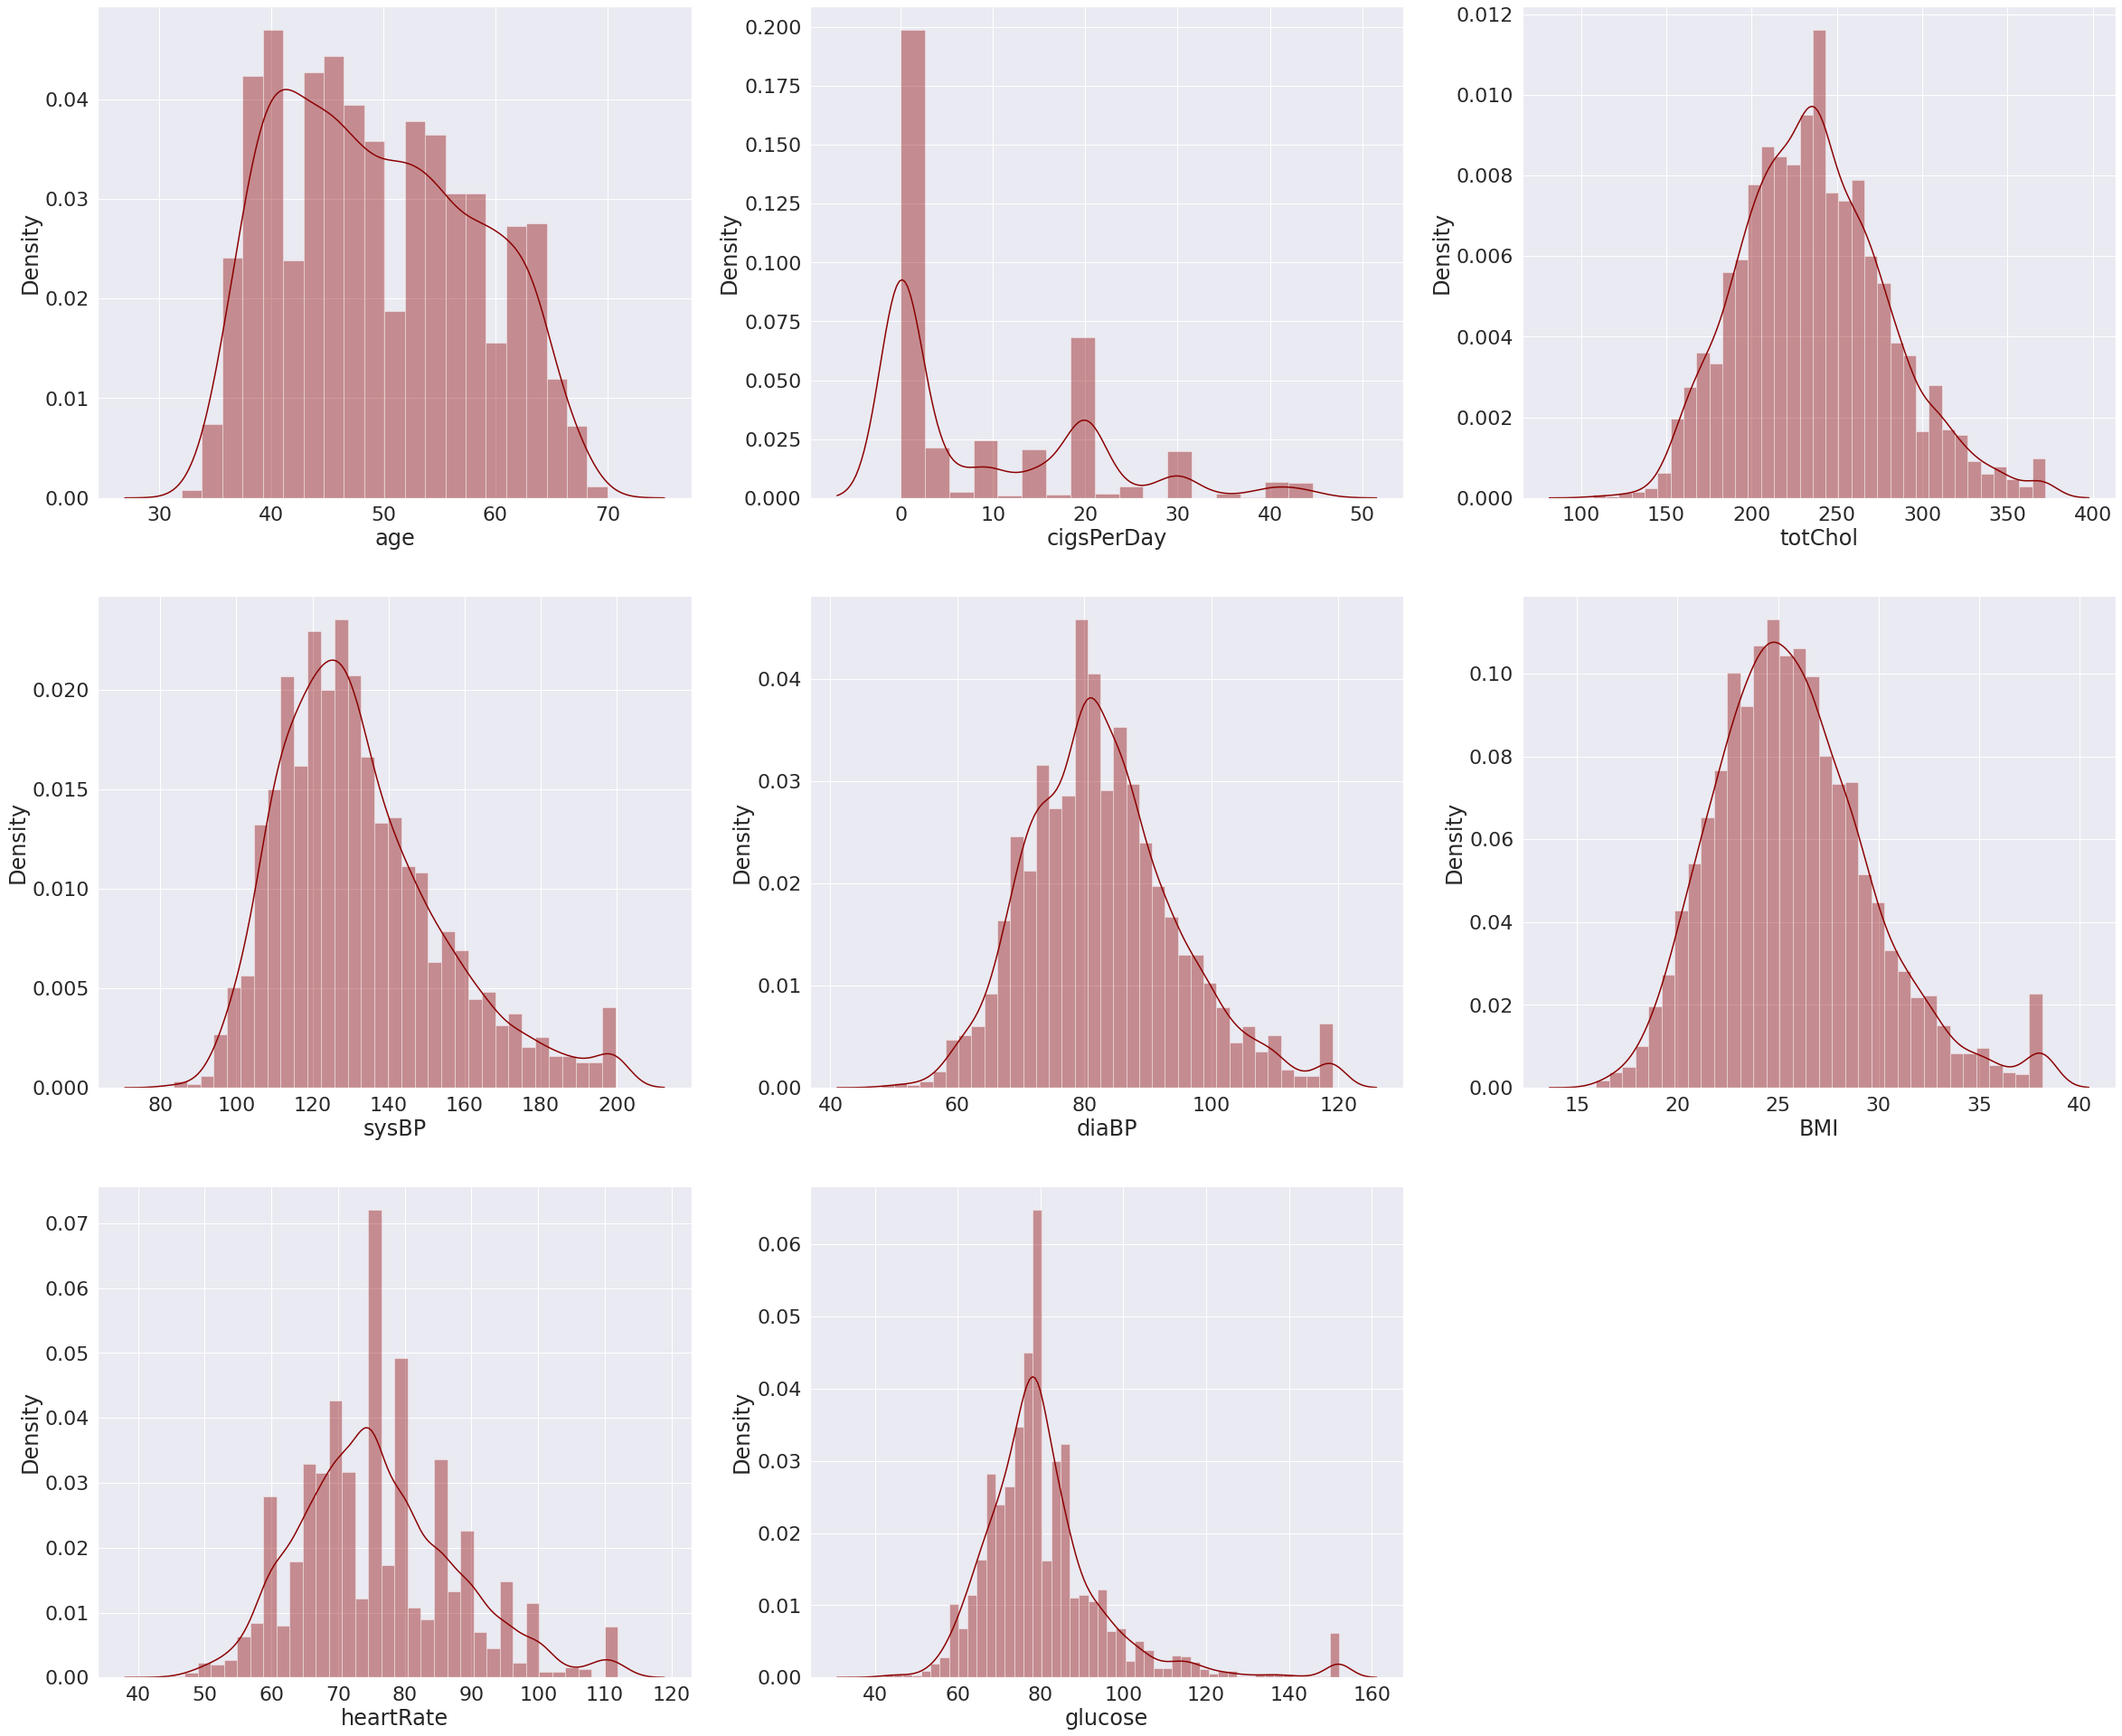

In [17]:
# Distribution plot for numerical variables
lst_dist = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'darkred')

In [18]:
# Values counts
lst_cate = ['sex', 'is_smoking','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
for col in lst_cate:
  print(df[col].value_counts())

0    1904
1    1461
Name: sex, dtype: int64
0    1694
1    1671
Name: is_smoking, dtype: int64
0    3343
1      22
Name: prevalentStroke, dtype: int64
0    2296
1    1069
Name: prevalentHyp, dtype: int64
0    3278
1      87
Name: diabetes, dtype: int64
0    2856
1     509
Name: TenYearCHD, dtype: int64


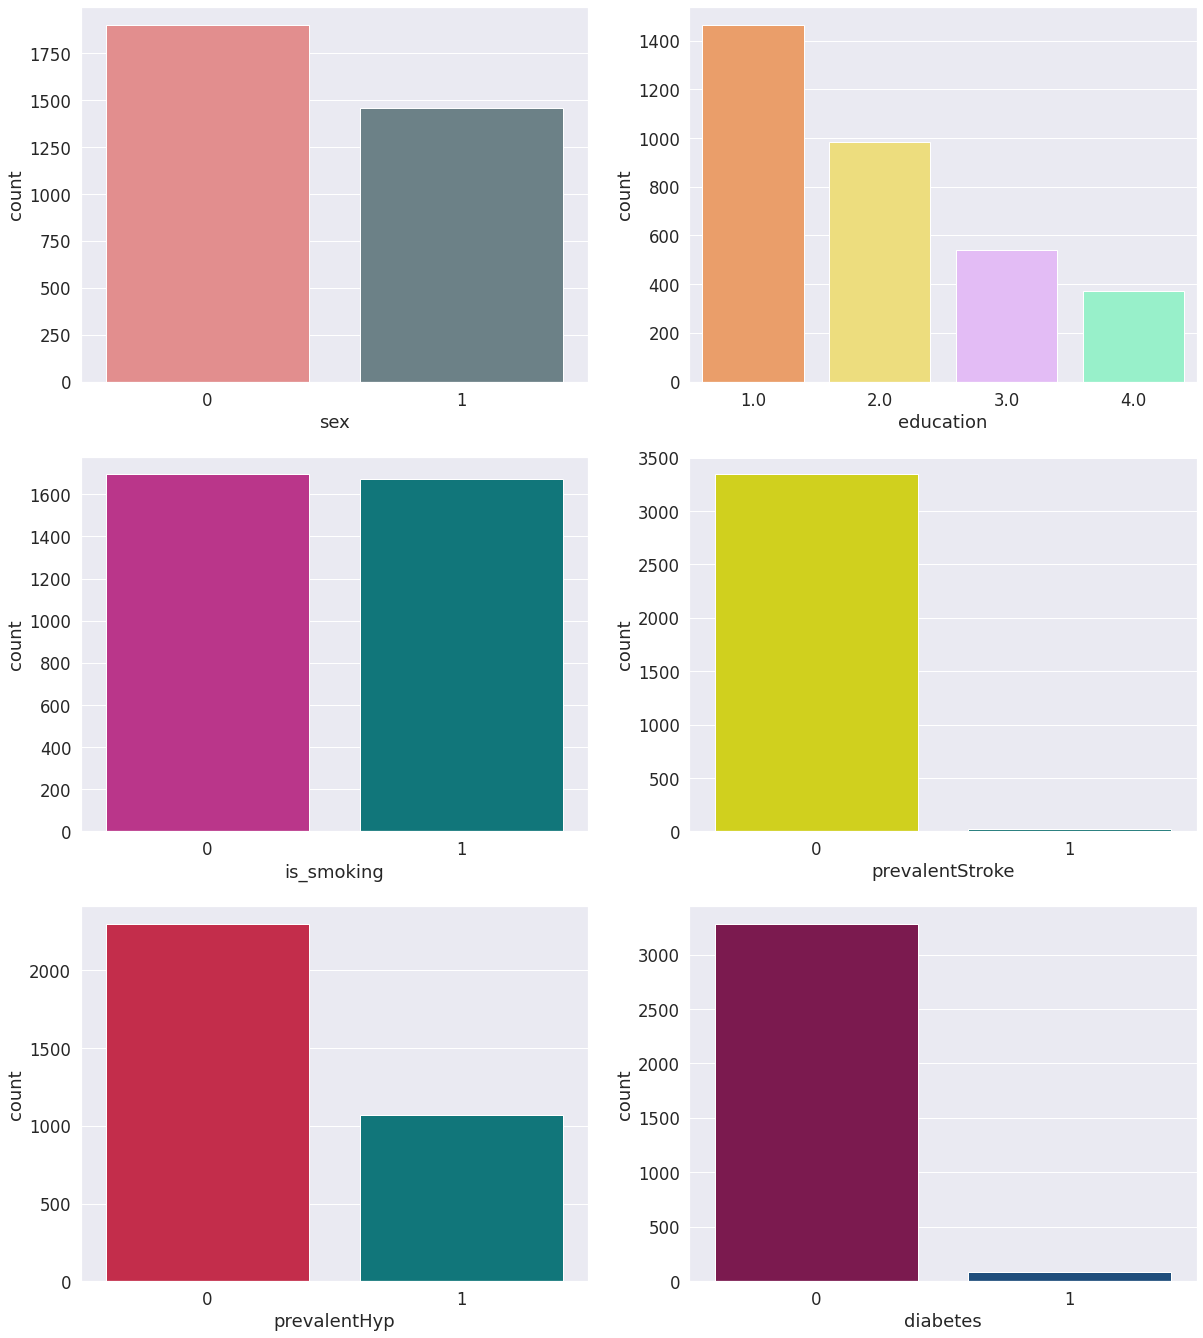

In [19]:
# Value counts Plot
categorical_var_count = ['sex', 'education', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#F08080','#68838B'],['#ff9a55','#ffea6c','#e7b2ff','#89ffcc'],['#D02090','#00868B'],['#EEEE00','#008080'],['#DC143C','#00868B'],['#8B0A50','#104E8B']]
for i in enumerate(categorical_var_count):
  sns.set(font_scale = 1.5)
  plt.subplot(5, 2,i[0]+1)
  sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])

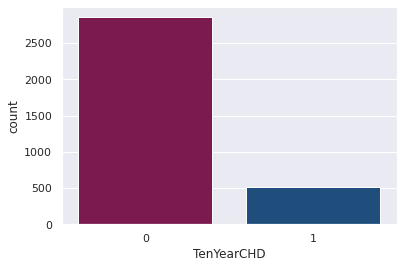

In [50]:
# Count plot for dependent variable

sns.countplot(data = df, x = 'TenYearCHD',palette= color[i[0]])

In [101]:
# Average of numeric independent variables with dependent variable
no_risk_avg_lst = []
risk_avg_lst = []
col_lst = ['totChol','age','cigsPerDay','BMI','sysBP','heartRate','glucose','diaBP']
xticks_lst = ['Total cholesterol level','Age','Cigarette per day','BMI','Systolic blood pressure ','Heart Rate','Glucose',' Diastolic blood pressure']
for col in col_lst:
  no_risk_avg = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(no_risk_avg.iloc[0,1])
  no_risk_avg_lst.append(round(no_risk_avg.iloc[0,1],2))
  risk_avg = df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(risk_avg.iloc[0,1])
  risk_avg_lst.append(round(risk_avg.iloc[0,1],2))
print(no_risk_avg_lst)
print(risk_avg_lst)

[235.15, 48.71, 8.74, 25.65, 130.59, 75.83, 80.08, 82.19]
[246.03, 54.16, 10.84, 26.37, 143.17, 76.51, 84.92, 86.56]


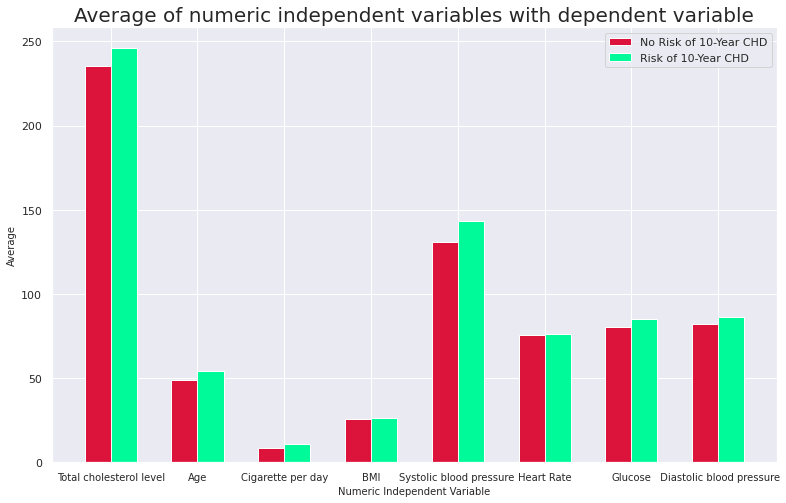

In [117]:
# Plot
bar1_list = no_risk_avg_lst
bar2_list = risk_avg_lst

width_of_RandA_rooms = 0.3
bar1 = np.arange(len(col_lst))
bar2 = [i + width_of_RandA_rooms for i in bar1]

plt.figure(figsize= (13,8))
plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = 'crimson', label = 'No Risk of 10-Year CHD')
plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = 'mediumspringgreen', label = 'Risk of 10-Year CHD')
plt.xlabel('Numeric Independent Variable',fontsize = 10)
plt.ylabel('Average',fontsize = 10)
plt.title('Average of numeric independent variables with dependent variable',fontsize = 20)
plt.xticks(bar1+width_of_RandA_rooms/2,xticks_lst,fontsize = 10)
plt.legend()
plt.show()

In [118]:
# Count of Categorical independent variables with dependent variable
no_risk_avg_lsts = []
risk_avg_lsts = []
col_lsts = ['is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
xticks_lsts = ['Blood Pressure Medication','Is Smoking','Previously had a stroke ','Diabetes','Patient was Hypertensive']
for cols in col_lsts:
  no_risk_avgs = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(no_risk_avgs.iloc[0,1])
  no_risk_avg_lsts.append(round(no_risk_avgs.iloc[0,1],2))
  risk_avgs= df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(risk_avgs.iloc[0,1])
  risk_avg_lsts.append(round(risk_avgs.iloc[0,1],2))
# print(no_risk_avg_lsts)
# print(risk_avg_lsts)

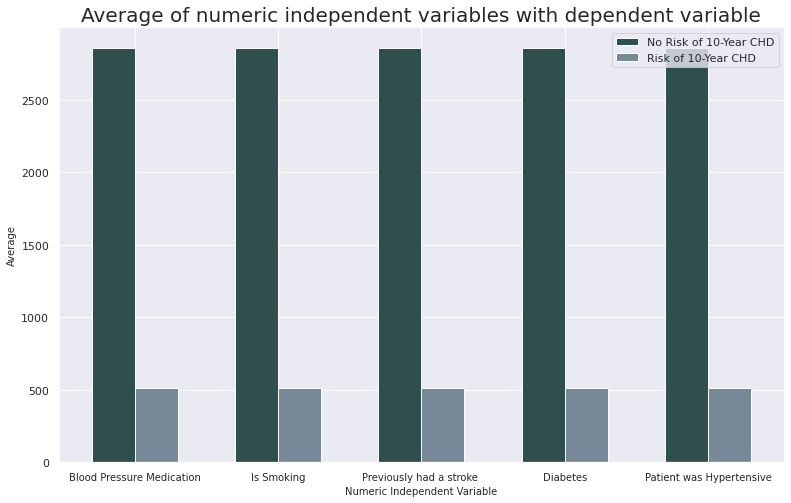

In [121]:
# Plot
bar1_list = no_risk_avg_lsts
bar2_list = risk_avg_lsts

width_of_RandA_rooms = 0.3
bar1 = np.arange(len(col_lsts))
bar2 = [i + width_of_RandA_rooms for i in bar1]

plt.figure(figsize= (13,8))
plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = 'darkslategray', label = 'No Risk of 10-Year CHD')
plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = 'lightslategray', label = 'Risk of 10-Year CHD')
plt.xlabel('Numeric Independent Variable',fontsize = 10)
plt.ylabel('Average',fontsize = 10)
plt.title('Average of numeric independent variables with dependent variable',fontsize = 20)
plt.xticks(bar1+width_of_RandA_rooms/2,xticks_lsts,fontsize = 10)
plt.legend()
plt.show()

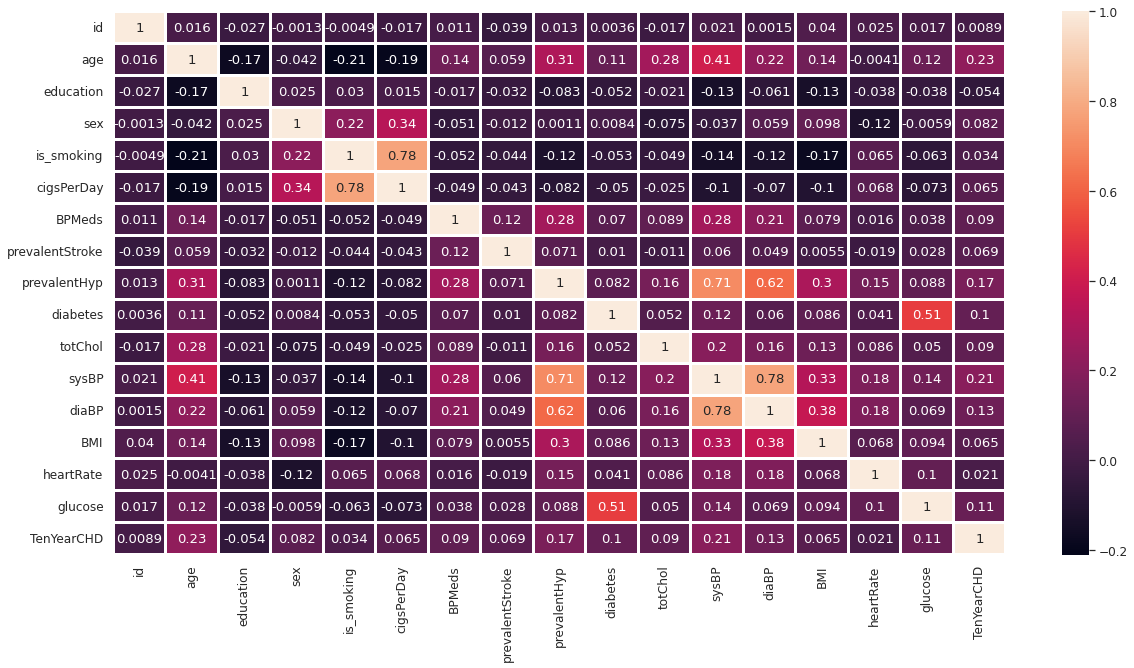

In [20]:
# Multicolinearity

plt.figure(figsize = (20, 10))
df_co_relation = df.corr()
sns.set(font_scale = 1.1)
sns.heatmap(df_co_relation, annot = True, linewidths = 2)
plt.show()

In [21]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [22]:
independent_variables = df.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']
print(independent_variables)
print(dependent_variable)

['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
['TenYearCHD']


In [23]:
# Logistic Regression
# Train test split
X = df[independent_variables].values
y = df[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2523, 15)
(842, 15)
(2523, 1)
(842, 1)


In [24]:
# Transforming data

# Normailzation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [25]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [26]:
# Get the predicted probabilities
train_proba_preds = clf.predict_proba(X_train)
test_proba_preds = clf.predict_proba(X_test)

In [27]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [28]:
# Get the accuracy scores
train_accuracy = (accuracy_score(train_class_preds,y_train))*100
test_accuracy = (accuracy_score(test_class_preds,y_test))*100

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  85.61236623067776
The accuracy on test data is  84.79809976247031


[[2142    8]
 [ 355   18]]


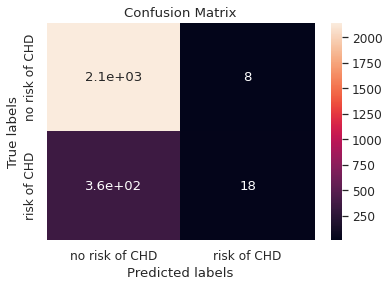

In [29]:
# Get the confusion matrix for train

labels = ['no risk of CHD', 'risk of CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
sns.set(font_scale = 1)

[[705   1]
 [127   9]]


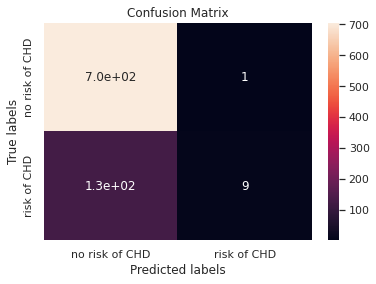

In [30]:
# Get the confusion matrix for test

labels = ['no risk of CHD', 'risk of CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
sns.set(font_scale = 1)

In [31]:
# Observations from Confusion Matrix
# True Negative(TN) = Persons who dont have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# True Positive(TP) = Persons who have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
# False Negative(FN) = Persons who have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# False Positive(FP) = Persons who dont have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
TN = 705
TP = 9
FN = 127
FP = 1
# Precision - shows how correct the model is, when it predicts that a person has a risk of 10-year CHD.
Precision = (TP/(TP+FP)) *100
print('Precision: ',Precision)
# 
# Recall - for all presons who have a risk of 10-year CHD, how many the model have correctly predicted as having a risk of 10-year CHD.
Recall = (TP/(TP+FN)) * 100
print('Recall: ',round(Recall,1))

Precision:  90.0
Recall:  6.6


In [32]:
# In the given case 
# A person with a risk of 10-year CHD cannot be classified as 'No risk of 10-year CHD'
# In our test dataset, 136 have a risk of 10-year CHD but our model predicted only 9 have a risk of 10-year CHD which is only 6.6%.
# In Logistic Regression the desired Recall is not acheived.

In [33]:
# Decision Tree Classifier
data = pd.read_csv('/content/Mydrive/MyDrive/Captone_Project_Supervised_ML_Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv')

In [34]:
independent_variables = df.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']
print(independent_variables)
print(dependent_variable)

['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
['TenYearCHD']


In [35]:
# Train test split
X = df[independent_variables].values
y = df[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2523, 15)
(842, 15)
(2523, 1)
(842, 1)


In [36]:
# Transforming data

# Normailzation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [37]:
# DesicionTreeclassifier
humidity_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [38]:
# Predicting values
y_train_dt_predict = humidity_classifier.predict(X_train)
y_test_dt_predict= humidity_classifier.predict(X_test)


In [39]:
train_accuracy = (accuracy_score(y_train, y_train_dt_predict) * 100)
test_accuracy = (accuracy_score(y_test, y_test_dt_predict) * 100)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  85.57273087594133
The accuracy on test data is  84.56057007125891


[[703   3]
 [127   9]]


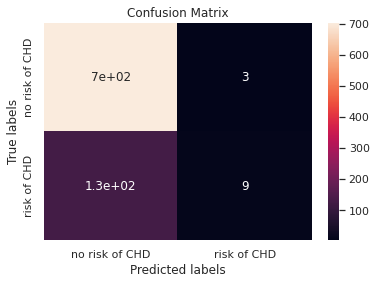

In [40]:
# Get the confusion matrix for test

labels = ['no risk of CHD', 'risk of CHD']
cm = confusion_matrix(y_test, y_test_dt_predict)
print(cm)

ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
sns.set(font_scale = 1)

In [41]:
# Metrics
TN = 703
TP = 9
FN = 127
FP = 3
Precision = (TP/(TP+FP)) *100
print('Precision: ',Precision)
# 
Recall = (TP/(TP+FN)) * 100
print('Recall: ',round(Recall,1))

Precision:  75.0
Recall:  6.6


In [42]:
# Ensemble of Decision Tree

In [43]:
# RandomForestClassifer
# Number of trees
n_estimators = [170]

# Maximum depth of trees
max_depth = [5]

# Minimum number of samples required to split a node
min_samples_split = [80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [44]:
# Create an instance of the RandomForestClassifier
rfc_model = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc_model,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')

rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=170; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=170; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=170; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=170; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=170; total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'min_samples_leaf': [40],
                         'min_samples_split': [80], 'n_estimators': [170]},
             scoring='roc_auc', verbose=2)

In [45]:
rfc_optimal_model = rfc_grid.best_estimator_

In [46]:
rfc_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 170}

In [47]:
# Making predictions on train and test data

y_train_predict_rfc_cv = rfc_optimal_model.predict(X_train)
y_test_predict_rfc_cv = rfc_optimal_model.predict(X_test)

# Calculating accuracy on train and test
train_accuracy_rfc_cv = (accuracy_score(y_train,y_train_predict_rfc_cv))*100
test_accuracy_rfc_cv = (accuracy_score(y_test,y_test_predict_rfc_cv))*100

print("The accuracy on train dataset is", train_accuracy_rfc_cv)
print("The accuracy on test dataset is", test_accuracy_rfc_cv)

The accuracy on train dataset is 85.21601268331351
The accuracy on test dataset is 83.8479809976247


[[706   0]
 [136   0]]


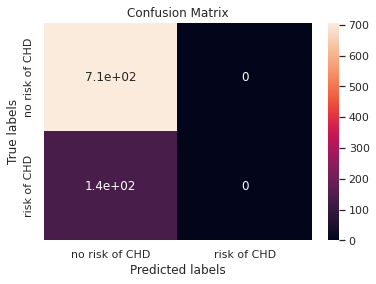

In [48]:
# Get the confusion matrix for test

labels = ['no risk of CHD', 'risk of CHD']
cm = confusion_matrix(y_test, y_test_predict_rfc_cv)
print(cm)

ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
sns.set(font_scale = 1)

In [49]:
# class Imbalnce needs to be done